In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

In [235]:
import linear_gp as gp
import importlib
importlib.reload(gp)
import numpy as np

[[ 0.01575024]
 [ 0.00656482]]
(array([ 0.00099024,  0.0009881 ]), matrix([[ 0.96594578, -0.25874458],
        [ 0.25874458,  0.96594578]]))


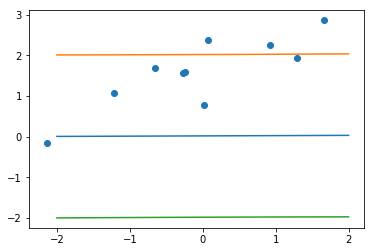

In [260]:
d = 2
n = 10
l = np.matrix(np.diag([1000, 1000]))
model = gp.LinearGP(l * np.identity(d))

w = np.matrix([1, 1]).T

x = np.matrix(np.ones((d, n)))
x[1] = np.matrix(1*np.random.randn(n))

sigma = 1
eps = sigma * np.matrix(np.random.randn(n)).T

y = (x.T * w + eps)

model.fit(x, y, sigma)
def fmt(mat):
    return np.squeeze(np.asarray(mat))

viz    = np.matrix(np.ones((d, 100)))
viz[1] = np.linspace(-2, 2, 100)

plt.plot(fmt(viz[1]), fmt(viz.T * model.post_mean))
plt.scatter(fmt(x[1]), fmt(y))
upper = list()
lower = list()
for i in range(viz.shape[1]):
    m,v = model.predict(viz[:, i])
    m = fmt(m); v = fmt(v)
    upper.append(m + 2*np.sqrt(v))
    lower.append(m - 2*np.sqrt(v))
plt.plot(fmt(viz[1]), upper)
plt.plot(fmt(viz[1]), lower)
print(model.post_mean)
print(np.linalg.eig(model.post_var))

In [139]:
model.post_var

matrix([[  1.00000000e-05,   2.45756165e-16],
        [  2.45756165e-16,   1.00000000e-01]])

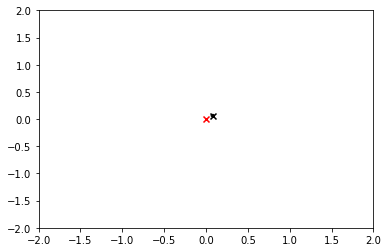

In [222]:
from matplotlib.patches import Ellipse
ew, ev = np.linalg.eig(model.post_var)
angle = np.arctan(fmt(ev)[0, 0] / fmt(ev)[1, 0])

fig, ax = plt.subplots()
plt.scatter([model.post_mean[0]], [model.post_mean[1]], c='black', marker='x')
plt.scatter([w[0]], [w[1]], c='red', marker='x')
for i in [1, 2]:
    e = Ellipse(fmt(model.post_mean), 2*i*ew[0], 2*i*ew[1], angle)
    e.set_fill(False)
    e.set_edgecolor('black')
    e.set_clip_box(ax.bbox)
    e.set_alpha(1)
    ax.add_artist(e)
    
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()
